In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
# from dataaug import SmilesEnumerator, SmilesIterator
from datagen import DataGenerator, smiles_dict, smiles_to_seq

2023-02-05 06:44:08.707031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
len(smiles_dict)

42

In [4]:
print(smiles_dict)

{'#': 1, '(': 2, ')': 3, '+': 4, '-': 5, '/': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '=': 15, 'C': 16, 'F': 17, 'H': 18, 'I': 19, 'N': 20, 'O': 21, 'P': 22, 'S': 23, '[': 24, '\\': 25, ']': 26, '_': 27, 'c': 28, 'Cl': 29, 'Br': 30, 'n': 31, 'o': 32, 's': 33, '@': 34, '.': 35, 'a': 36, 'B': 37, 'e': 38, 'i': 39, '9': 40, '10': 41, '11': 42}


Data augmentation:

https://arxiv.org/pdf/1703.07076.pdf

https://github.com/EBjerrum/molvecgen

https://github.com/Ebjerrum/SMILES-enumeration

In [5]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [6]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()
max_sequence_len = len(df['canonical_smiles'].iloc[max_len_idx]) + 20

In [7]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,750.00,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,100.00,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,50000.00,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,300.00,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,800.00,6.096910
...,...,...,...,...,...
5818,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,2.57,8.590067
5819,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,2.39,8.621602
5820,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,0.41,9.387216
5821,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,0.63,9.200659


In [8]:
X = df['canonical_smiles'].values
y = df['pIC50'].values

In [9]:
dgen = DataGenerator(X, y, max_sequence_len, batch_size=16)

In [10]:
len(dgen) * dgen.batch_size

5824

In [11]:
for i, (X_b, y_b) in enumerate(dgen):
    print(f'{i}\r', end='')


# Canonical_smiles To secuence

In [12]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# tk = Tokenizer(char_level=True, lower=False, )
# tk.fit_on_texts(X, )
# tk.word_index
# X_seq = tk.texts_to_sequences(X, )
# X_seq_pad = pad_sequences(X_seq)

In [13]:
# df['canonical_smiles_encoded'] = df['canonical_smiles'].apply(lambda x: smiles_to_seq(x, max_sequence_len))

In [14]:
# X = np.array([l for l in df['canonical_smiles_encoded'].values])
# y = df['pIC50'].values

In [15]:
X.shape, y.shape

((5823,), (5823,))

In [16]:
# X[max_len_idx]

In [17]:
# X[min_len_idx]

# Split

In [18]:
#import mlflow.keras
#mlflow.autolog()
#! mlflow ui

In [19]:
test_size=0.2
padding_type = 'pre'   #post

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
len(X_train), len(y_train), len(X_test)

(4658, 4658, 1165)

In [23]:
X_train

array(['COc1ccc(C(=O)c2ccc(CN(C)Cc3cccc([N+](=O)[O-])c3)cc2)cc1OC',
       'CC(C)(c1ccc(-c2cnc3[nH]c4cnc(C#N)cc4c3c2)cc1)N1CCCCC1',
       'C=CC[N+](C)(C)c1ccccc1OC.[Br-]', ...,
       'C(=N\\C1CCN(Cc2ccccc2)C1)\\c1ccccc1',
       'COc1cc2c(cc1O)CCC(C)(CCNCCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2',
       'CN(C)Cc1ccc(CSCCCCCCCCSCc2ccc(CN(C)C)o2)o1'], dtype=object)

In [24]:
batch_size=128  #64

In [25]:
dgen_train = DataGenerator(X_train, y_train, seq_length=max_sequence_len, batch_size=batch_size, data_augmentation=True)
dgen_test = DataGenerator(X_test, y_test, seq_length=max_sequence_len, batch_size=batch_size, data_augmentation=False)

In [26]:
for i, (X_b, y_b) in enumerate(dgen_test):
    print(f'{i}\r', end='')

In [27]:
X_b.shape

(13, 227)

# Data augmentation (Optional)

In [28]:
# X_train = np.vstack([X_train, X_train[:, ::-1]])

In [29]:
# X_train.shape

In [30]:
# y_train = np.hstack([y_train, y_train])

In [31]:
# y_train.shape


# Network Model

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization, Conv1D, MaxPool1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K
import tensorflow as tf

In [33]:
from tensorflow.keras import layers as L

In [34]:
def text_cnn_1d(sequence_length, vocab_size, embedding_size, filter_sizes, num_filters):
    max_pool_div = 4
    input_x = L.Input(shape=(sequence_length,), name='input_x')
    embedding = L.Embedding(vocab_size + 1, embedding_size, name='embedding')(input_x)
    pooled_outputs = []
    for filter_size in filter_sizes:
        conv = L.Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', dilation_rate=1, activation='relu')(embedding)
        max_p = L.MaxPool1D((sequence_length - filter_size + 1)//max_pool_div)(conv)
        pooled_outputs.append(max_p)
        
        conv = L.Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', dilation_rate=2, activation='relu')(embedding)
        max_p = L.MaxPool1D((sequence_length - filter_size + 1)//max_pool_div)(conv)
        pooled_outputs.append(max_p)
        
        conv = L.Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', dilation_rate=3, activation='relu')(embedding)
        max_p = L.MaxPool1D((sequence_length - filter_size + 1)//max_pool_div)(conv)
        pooled_outputs.append(max_p)
    h_pool = L.Concatenate(axis=2)(pooled_outputs)
    dense = L.Flatten()(h_pool)
    dense = L.Dense(100, activation='relu')(dense)
    dense = L.Dense(100, activation='relu')(dense)
    dense = L.Dense(1)(dense)
    model = tf.keras.models.Model(input_x, dense)
    return model

def text_cnn_1d_short(sequence_length, vocab_size, embedding_size, filter_sizes, num_filters):
    max_pool_div = 4
    input_x = L.Input(shape=(sequence_length,), name='input_x')
    embedding = L.Embedding(vocab_size + 1, embedding_size, name='embedding')(input_x)
    pooled_outputs = []
    for filter_size in filter_sizes:
        conv = L.Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', dilation_rate=1, activation='relu')(embedding)
        max_p = L.MaxPool1D(128)(conv)
        pooled_outputs.append(max_p)
    h_pool = L.Concatenate(axis=2)(pooled_outputs)
    dense = L.Flatten()(h_pool)
    dense = L.Dense(100, activation='relu')(dense)
    dense = L.Dense(100, activation='relu')(dense)
    dense = L.Dense(1)(dense)
    model = tf.keras.models.Model(input_x, dense)
    return model

In [35]:
# Hyperparametros
learning_rate=0.001 #0.01   0.05    1e-3
epochs = 4     #50    30
batch_size=128     #64      32

lstm = 100 #64   20
dense_size = 100 #100 #50
drops = 0.8   #0.4
embeddings = 64

In [36]:
FILTER_SIZES = (3, 4, 5)
NUM_FILTERS = 128
vocab_size = len(smiles_dict)
embeddings_size = 128 # 2
# model = text_cnn(max_sequence_len, vocab_size + 1, embeddings_size, FILTER_SIZES, NUM_FILTERS, None, drop_out=0, l2_reg_lambda=0, dense_hidden_size=50)
# model.summary()

In [37]:
model = text_cnn_1d(max_sequence_len, vocab_size, embeddings_size, FILTER_SIZES, NUM_FILTERS)
#model = text_cnn_1d_short(max_sequence_len, vocab_size, embeddings_size, FILTER_SIZES, NUM_FILTERS)
model.summary()

2023-02-05 06:44:18.818547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_x (InputLayer)           [(None, 227)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 227, 128)     5504        ['input_x[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 227, 128)     49280       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 227, 128)     49280       ['embedding[0][0]']              
                                                                                              

In [38]:
# model.summary()

In [39]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [40]:
# # num_filters = 128
# dropout_rate=0.1
# embeddings_size = 64
# model = Sequential()
# model.add(Embedding(vocab_size + 1, embeddings_size, input_length=max_sequence_len))
# model.add(Conv1D(embeddings_size * 2, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(Conv1D(embeddings_size * 4, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(Conv1D(num_filters * 6, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(GlobalAveragePooling1D())
# # model.add(Flatten())
# model.add(Dense(50, activation='linear'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dense(1))

In [41]:
# model.summary()

In [42]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=[R2])

In [43]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor ='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_delta=0.01, cooldown=0, min_lr=1e-8)

In [44]:
%%time
history = model.fit(dgen_train, epochs=epochs, validation_data=dgen_test, callbacks=[mcp, earlyStopping, reduceLR])

Epoch 1/4
37/37 [==============================] - ETA: 0s - loss: 7.0348 - R2: -1.5987

INFO:tensorflow:Assets written to: models/best_model_1/assets


INFO:tensorflow:Assets written to: models/best_model_1/assets


37/37 [==============================] - 29s 725ms/step - loss: 7.0348 - R2: -1.5987 - val_loss: 2.9799 - val_R2: -0.0518 - lr: 0.0010
Epoch 2/4
37/37 [==============================] - ETA: 0s - loss: 2.3877 - R2: 0.0939

INFO:tensorflow:Assets written to: models/best_model_2/assets


INFO:tensorflow:Assets written to: models/best_model_2/assets


37/37 [==============================] - 29s 784ms/step - loss: 2.3877 - R2: 0.0939 - val_loss: 2.3732 - val_R2: 0.1693 - lr: 0.0010
Epoch 3/4
37/37 [==============================] - ETA: 0s - loss: 2.1555 - R2: 0.1838

INFO:tensorflow:Assets written to: models/best_model_3/assets


INFO:tensorflow:Assets written to: models/best_model_3/assets


37/37 [==============================] - 27s 725ms/step - loss: 2.1555 - R2: 0.1838 - val_loss: 2.1912 - val_R2: 0.2455 - lr: 0.0010
Epoch 4/4
37/37 [==============================] - ETA: 0s - loss: 2.0352 - R2: 0.2309

INFO:tensorflow:Assets written to: models/best_model_4/assets


INFO:tensorflow:Assets written to: models/best_model_4/assets


37/37 [==============================] - 29s 807ms/step - loss: 2.0352 - R2: 0.2309 - val_loss: 2.1223 - val_R2: 0.2462 - lr: 0.0010
CPU times: user 8min 22s, sys: 1min 26s, total: 9min 49s
Wall time: 1min 54s


In [45]:
# model.history.history

In [46]:
X_test_eval = []
y_t_eval = []
for X_t, y_t in dgen_test:
    X_test_eval = X_test_eval + [list(t) for t in X_t]
    y_t_eval = y_t_eval + list(y_t)
X_test_eval = np.array(X_test_eval)
y_test = np.array(y_t_eval)

In [47]:
X_test_eval.shape, y_test.shape

((1165, 227), (1165,))

In [48]:
y_pred = model.predict(X_test_eval)

37/37 [==============================] - 2s 46ms/step


# Score

In [49]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [50]:
r2
# 0.4984533246797399

0.24341891877276367

In [51]:
filename = 'models/004-embed_short.h5'
#model.save(filename)

In [52]:
# model.summary()

# Load model (solo si se grabo el modelo)

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model_loaded = load_model(filename, custom_objects={'R2': R2})

In [55]:
model_loaded.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_x (InputLayer)           [(None, 227)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 227, 128)     5504        ['input_x[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 227, 128)     49280       ['embedding[0][0]']              
                                                                                                  
 conv1d_4 (Conv1D)              (None, 227, 128)     49280       ['embedding[0][0]']              
                                                                                            

In [56]:
y_pred = model_loaded.predict(X_test_eval)

37/37 [==============================] - 2s 49ms/step


In [57]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6919794936916983

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

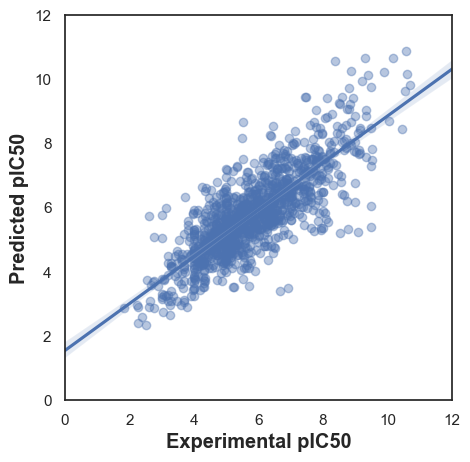

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# TSNE

In [59]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [60]:
embedings = model.layers[1].get_weights()[0][1:]

In [61]:
embedings.shape

(42, 128)

In [62]:
if embedings.shape[1] == 2:
    print('TSNE not necesary. Already in R2')
    X_2d = embedings.copy()
else:
    tsne = TSNE(2)
    X_2d = tsne.fit_transform(embedings)
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


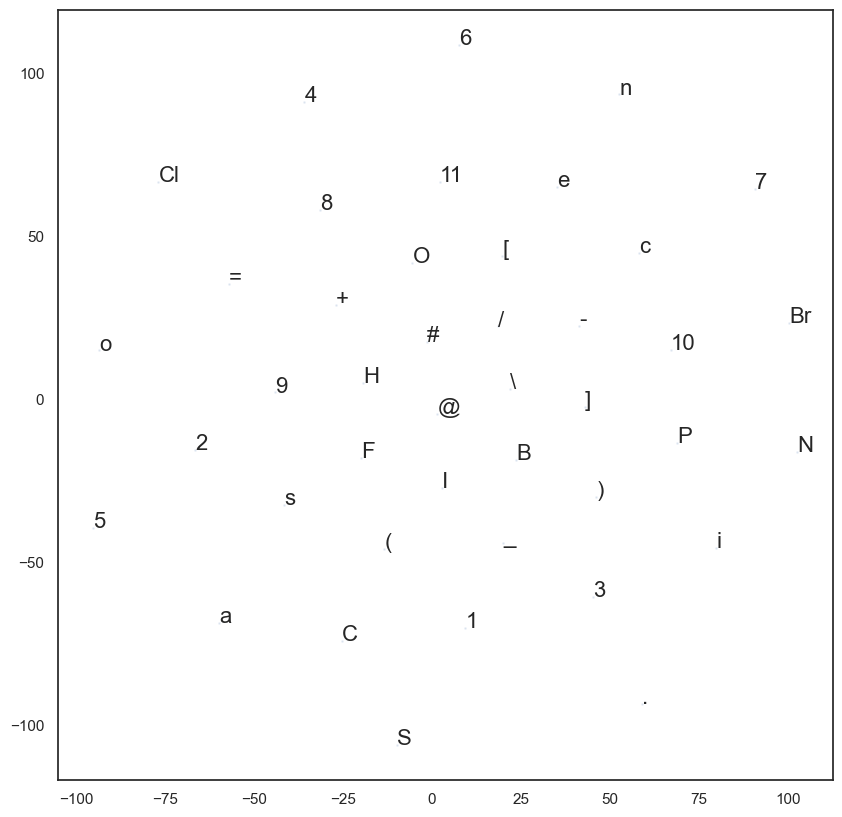

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1, alpha=0.1)
for i, t in enumerate(smiles_dict):
    plt.text(X_2d[i, 0], X_2d[i, 1], t, fontsize=16)

In [64]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 05/02/2023 06:46:21
